In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
%matplotlib inline

In [3]:
def accuracy(y_true, y_pred):
    correct = 0
    for yt, yp in zip(y_true, y_pred):
        # Being clever with how booleans are ints in Python:
        correct += yt == yp
    return correct / len(y_true)

In [4]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
print(f"accuracy = {accuracy(l1, l2)}, sklearn accuracy = {metrics.accuracy_score(l1, l2)}")

accuracy = 0.625, sklearn accuracy = 0.625


In [5]:
def true_positive_count(y_true, y_pred):
    return sum(
        1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1
    )

def true_positive_rate(y_true, y_pred):
    return true_positive_count(y_true, y_pred) / len(y_true)

def true_negative_count(y_true, y_pred):
    return sum(
        1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 0
    )

def true_negative_rate(y_true, y_pred):
    return true_negative_count(y_true, y_pred) / len(y_true)

def false_positive_count(y_true, y_pred):
    return sum(
        1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1
    )

def false_positive_rate(y_true, y_pred):
    return false_positive_count(y_true, y_pred) / len(y_true)

def false_negative_count(y_true, y_pred):
    return sum(
        1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0
    )

def false_negative_rate(y_true, y_pred):
    return false_negative_count(y_true, y_pred) / len(y_true)

def alternate_accuracy(y_true, y_pred):
    tpr = true_positive_rate(y_true, y_pred)
    tnr = true_negative_rate(y_true, y_pred)
    fpr = false_positive_rate(y_true, y_pred)
    fnr = false_negative_rate(y_true, y_pred)
    return (tpr + tnr) / (tpr + tnr + fpr + fnr)

In [6]:
print(f"alternate accuracy = {accuracy(l1, l2)}")

alternate accuracy = 0.625


In [7]:
def precision(y_true, y_pred):
    tpr = true_positive_rate(y_true, y_pred)
    fpr = false_positive_rate(y_true, y_pred)
    return tpr / (tpr + fpr)

In [8]:
print(f"{precision(l1, l2) = }")

precision(l1, l2) = 0.6666666666666666


In [9]:
def recall(y_true, y_pred):
    tpr = true_positive_rate(y_true, y_pred)
    fnr = false_negative_rate(y_true, y_pred)
    return tpr / (tpr + fnr)

In [10]:
print(f"{recall(l1, l2) = }")

recall(l1, l2) = 0.5


In [11]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937,  0.0191491,  0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377,   0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815,]

In [12]:
len(y_true) == len(y_pred)

True

In [13]:
precisions = []
recalls = []
classification_thresholds = [0.0490937 , 0.05934905, 0.079377,
                             0.08584789, 0.11114267, 0.11639273,
                             0.15952202, 0.17554844, 0.18521942,
                             0.27259048, 0.31620708, 0.33056815,
                             0.39095342, 0.61977213,]

for threshold in classification_thresholds:
    temp_predictions = [int(pred >= threshold) for pred in y_pred]
    precisions.append(precision(y_true, temp_predictions))
    recalls.append(recall(y_true, temp_predictions))

Text(0, 0.5, 'Precision')

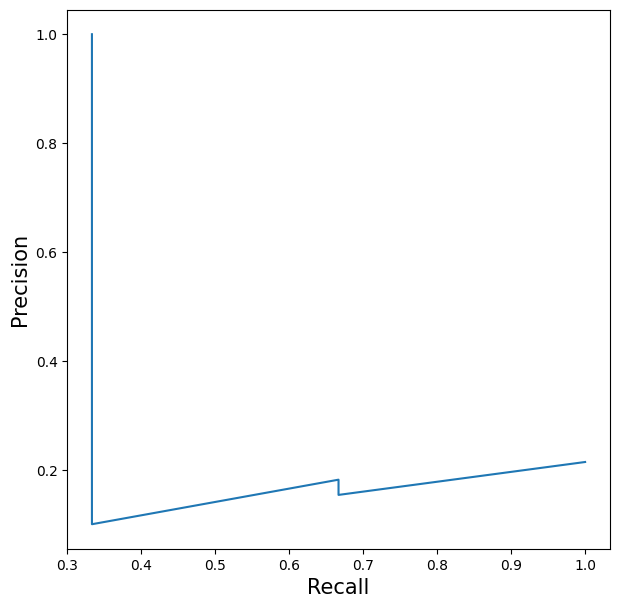

In [14]:
plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)

In [15]:
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec  = recall(y_true, y_pred)
    return (2 * prec * rec) / (prec + rec)

In [16]:
print(f"Our F1 score = {f1_score(l1, l2):.4}, sklearn's = {metrics.f1_score(l1, l2):.4}")

Our F1 score = 0.5714, sklearn's = 0.5714


In [17]:
tprs = []
fprs = []

y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1,]

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99,]

thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for threshold in thresholds:
    temp_preds = [int(p >= threshold) for p in y_pred]
    tprs.append(true_positive_rate(y_true, temp_preds))
    fprs.append(false_positive_rate(y_true, temp_preds))    

In [18]:
df = pd.DataFrame({
    "threshold": thresholds,
    "tpr": tprs,
    "fpr": fprs,
})
df

,threshold,tpr,fpr
0,0.00,0.333333,0.666667
1,0.10,0.333333,0.600000
2,0.20,0.333333,0.466667
3,0.30,0.266667,0.400000
4,0.40,0.266667,0.200000
5,0.50,0.266667,0.200000
6,0.60,0.266667,0.133333
7,0.70,0.200000,0.066667
8,0.80,0.200000,0.066667
9,0.85,0.133333,0.066667


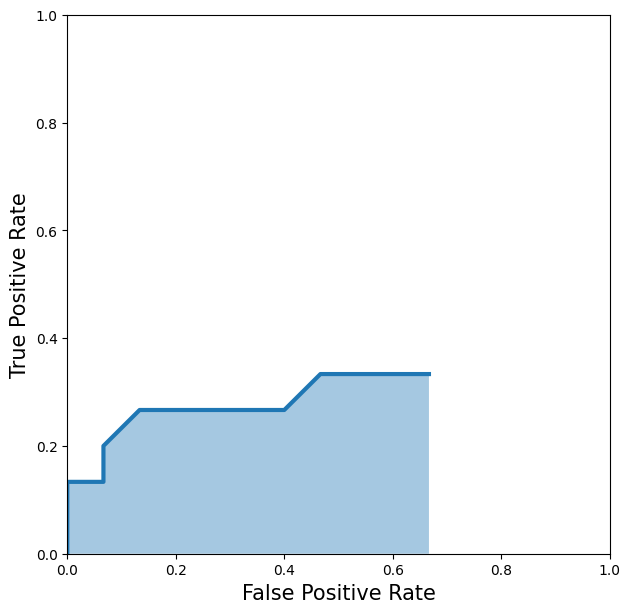

In [19]:
plt.figure(figsize=(7, 7))
plt.fill_between(fprs, tprs, alpha=0.4)
plt.plot(fprs, tprs, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.show()

In [20]:
print(f"ROC AUC score = {metrics.roc_auc_score(y_true, y_pred):.4}")

ROC AUC score = 0.83


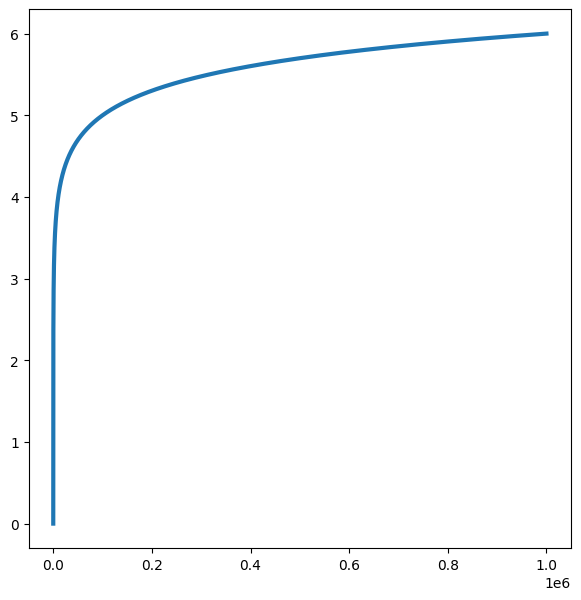

In [21]:
xs = np.arange(1, 1_000_000)
ys = np.log10(xs)
plt.figure(figsize=(7, 7))
plt.plot(xs, ys, lw=3)

In [22]:
def ll(true, pred):
    pos_error = true * np.log(pred)
    neg_error = (1 - true) * np.log(1 - pred)
    return -1 * (pos_error + neg_error)

vec_ll = np.vectorize(ll)

def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    losses = vec_ll(y_true, y_pred)
    return np.mean(losses)

In [23]:
print(f"Log loss = {log_loss(y_true, y_pred):.4}")

Log loss = 0.4988


In [24]:
def macro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    total_precision = 0
    for class_id in range(num_classes):
        current_class_true = [int(y == class_id) for y in y_true]
        current_class_pred = [int(y == class_id) for y in y_pred]
        current_class_prec = precision(current_class_true, current_class_pred)
        total_precision += current_class_prec
    return total_precision / num_classes

def micro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    total_tpc = 0
    total_fpc = 0
    for class_id in range(num_classes):
        current_class_true = [int(y == class_id) for y in y_true]
        current_class_pred = [int(y == class_id) for y in y_pred]
        total_tpc += true_positive_count(current_class_true, current_class_pred)
        total_fpc += false_positive_count(current_class_true, current_class_pred)
    precision = total_tpc / (total_tpc + total_fpc)
    return precision

def weighted_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    running_precision = 0
    
    for class_id in range(num_classes):
        current_class_true = [int(y == class_id) for y in y_true]
        current_class_pred = [int(y == class_id) for y in y_pred]
        current_class_prec = precision(current_class_true, current_class_pred)
        weighted_prec = class_counts[class_id] * current_class_prec
        running_precision += weighted_prec

    overall_prec = running_precision / len(y_true)
    return overall_prec

In [25]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [26]:
print(
    f"Our macro precision implementation = {macro_precision(y_true, y_pred):.4}, " 
    f"sklearn's = {metrics.precision_score(y_true, y_pred, average='macro'):.4}"
)

Our macro precision implementation = 0.3611, sklearn's = 0.3611


In [27]:
print(f"Our micro precision implementation = {micro_precision(y_true, y_pred):.4}, sklearn's = {metrics.precision_score(y_true, y_pred, average='micro'):.4}")

Our micro precision implementation = 0.4444, sklearn's = 0.4444


In [28]:
print(f"Our weighted precision implementation = {weighted_precision(y_true, y_pred):.4}, sklearn's = {metrics.precision_score(y_true, y_pred, average='weighted'):.4}")

Our weighted precision implementation = 0.3981, sklearn's = 0.3981


In [39]:
def accuracy_np(y_true: np.ndarray, y_pred: np.ndarray):
    if len(y_true.shape) != 1:
        raise ValueError(f"Accuracy is only defined for vectors, {y_true.shape = }")
    return np.sum(y_true == y_pred) / y_true.shape[0]

In [40]:
print(f"{accuracy_np(np.array(l1n), np.array(l2n)) = :.4}")

accuracy_np(l1n, l2n) = 0.625


In [41]:
def weighted_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    cumulative_f1 = 0
    for class_id in range(num_classes):
        current_class_true = [int(y == class_id) for y in y_true]
        current_class_pred = [int(y == class_id) for y in y_pred]
        current_class_prec = precision(current_class_true, current_class_pred)
        current_class_recall = recall(current_class_true, current_class_pred)

        # If the denominator of the current class' F1 would be 0, we can just continue
        if (denom := current_class_prec + current_class_recall) == 0:
            continue
        current_class_f1 = (2 * current_class_prec * current_class_recall) / denom
        weighted_f1 = class_counts[class_id] * current_class_f1
        cumulative_f1 += weighted_f1
    f1 = cumulative_f1 / len(y_true)
    return f1

In [42]:
print(f"Our weighted F1 = {weighted_f1(y_true, y_pred):.4}, sklearn's = {metrics.f1_score(y_true, y_pred, average='weighted'):.4}")

Our weighted F1 = 0.4127, sklearn's = 0.4127


## Multilabel Classification

In [50]:
def precision_at_k(y_true, y_pred, k):
    """Calculate precision @ k for a _single_ observation/sample.
    """
    if k < 1:
        raise ValueError(f"Precision @ k is undefined for k <= 0 (got {k})")
    y_pred = y_pred[:k]
    pred_labels = set(y_pred)
    true_labels = set(y_true)
    intersection = pred_labels & true_labels
    return len(intersection) / len(y_pred[:k])

def average_precision_at_k(y_true, y_pred, k):
    """Calculate average precision @ k for a _single_
    observation/sample.
    """
    pk_values = [precision_at_k(y_true, y_pred, k=i) for i in range (1, k+1)]
    if len(pk_values) == 0:
        return 0
    return sum(pk_values) / len(pk_values)

In [52]:
y_true = [
    [1, 2, 3,],
    [0, 2,],
    [1,],
    [2, 3,],
    [1, 0,],
    [],
]

y_pred = [
    [0, 1, 2,],
    [1,],
    [0, 2, 3,],
    [2, 3, 4, 0,],
    [0, 1, 2,],
    [0,],
]

In [53]:
for i in range(len(y_true)):
    for j in range(1, 4):
        print(
            f"""
            {y_true[i] = },
            {y_pred[i] = },
            Average Precision @ {j} = {average_precision_at_k(y_true[i], y_pred[i], k=j)} 
            """
        )


            y_true[i] = [1, 2, 3],
            y_pred[i] = [0, 1, 2],
            Average Precision @ 1 = 0.0 
            

            y_true[i] = [1, 2, 3],
            y_pred[i] = [0, 1, 2],
            Average Precision @ 2 = 0.25 
            

            y_true[i] = [1, 2, 3],
            y_pred[i] = [0, 1, 2],
            Average Precision @ 3 = 0.38888888888888884 
            

            y_true[i] = [0, 2],
            y_pred[i] = [1],
            Average Precision @ 1 = 0.0 
            

            y_true[i] = [0, 2],
            y_pred[i] = [1],
            Average Precision @ 2 = 0.0 
            

            y_true[i] = [0, 2],
            y_pred[i] = [1],
            Average Precision @ 3 = 0.0 
            

            y_true[i] = [1],
            y_pred[i] = [0, 2, 3],
            Average Precision @ 1 = 0.0 
            

            y_true[i] = [1],
            y_pred[i] = [0, 2, 3],
            Average Precision @ 2 = 0.0 
            

            y_true[i]

In [54]:
def mean_average_precision_at_k(y_true, y_pred, k):
    apks = [average_precision_at_k(yt, yp, k) for yt, yp in zip(y_true, y_pred)]
    return sum(apks) / len(apks)

In [56]:
for i in range(1, 5):
    print(f"Mean Average Precision @ k={i} = {mean_average_precision_at_k(y_true, y_pred, i):.4}")

Mean Average Precision @ k=1 = 0.3333
Mean Average Precision @ k=2 = 0.375
Mean Average Precision @ k=3 = 0.3611
Mean Average Precision @ k=4 = 0.3472


In [60]:
def mean_absolute_error(y_true: list, y_pred: list) -> float:
    total_error = sum(
        abs(yt - yp)
        for (yt, yp) in zip(y_true, y_pred)
    )
    return total_error / len(y_true)

def mean_absolute_error_np(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    total_error = np.sum(y_true - y_pred)
    return total_error / y_true.shape[0]

# got bored of typing out some fairly standard error metric formulas...

def r_squared(y_true: list[float], y_pred: list[float]) -> float:
    num = sum(
        (yt - yp) ** 2
        for (yt, yp) in zip(y_true, y_pred)
    )
    yt_mean = sum(y_true) / len(y_true)
    denom = sum(yt - yt_mean for yt in y_true)
    return 1 - (num / denom)